In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

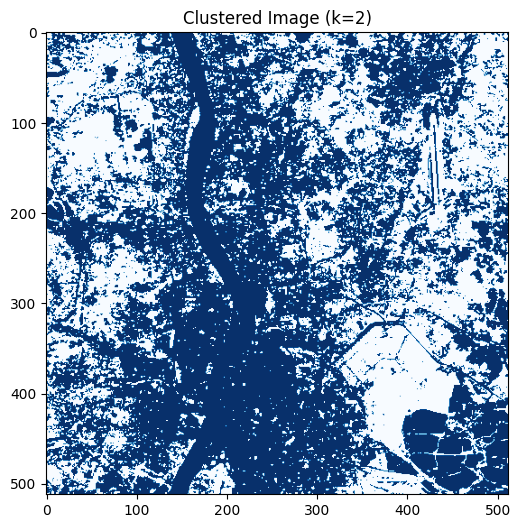

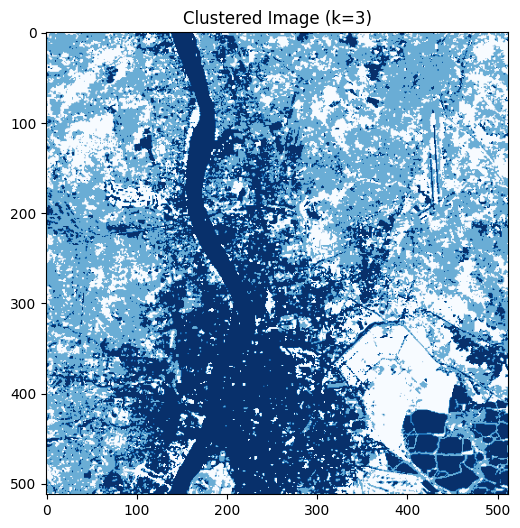

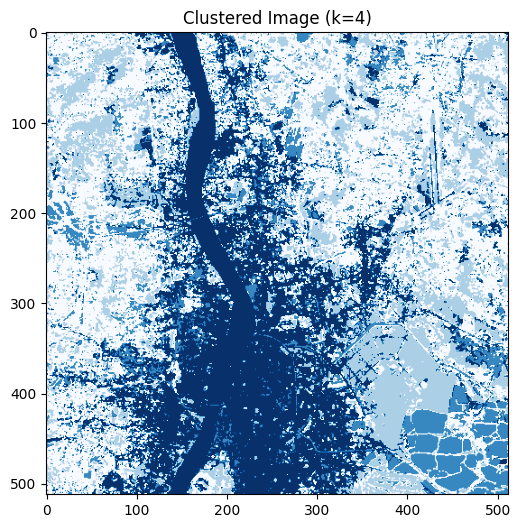

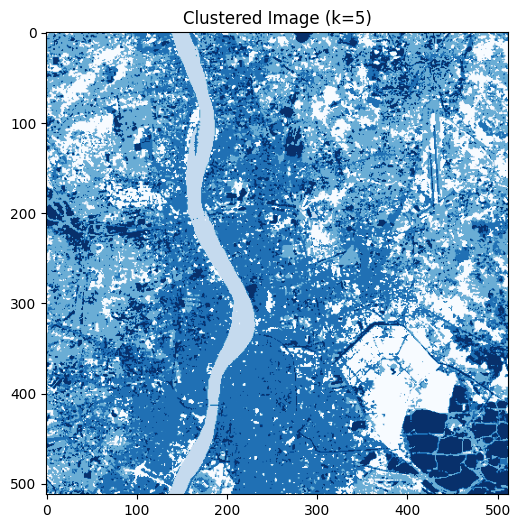

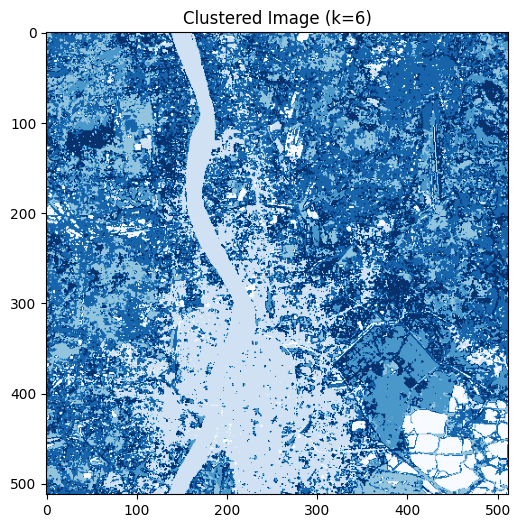

In [2]:

def load_image(filename):
    img = Image.open(filename)
    return np.array(img)

def initialize_centroids(data, k):
    centroids_idx = np.random.choice(len(data), size=k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

band1 = load_image("band1.gif")
band2 = load_image("band2.gif")
band3 = load_image("band3.gif")
band4 = load_image("band4.gif")

# Combining bands into one image
data = np.stack((band1, band2, band3, band4), axis=-1)

# Flatten the data
data_flatten = data.reshape((-1, 4))

k_values = [2, 3, 4, 5, 6]
for k in k_values:
    clusters, centroids = kmeans(data_flatten, k)
    
    # Reshape cluster labels back to image shape
    clustered_img = clusters.reshape((data.shape[0], data.shape[1]))

    # Plotting clustered image
    plt.figure(figsize=(8, 6))
    plt.imshow(clustered_img, cmap='Blues')
    plt.title(f'Clustered Image (k={k})')
    plt.show()
